# Dependency Parsing in NLP - Overview + Implementation
* Notebook by Adam Lang
* Date: 3/26/2024
* This notebook will give an overview of Dependency parsing in classical NLP and demonstrate code implementation in Python.


# What is Dependency Parsing?
* Used to analyze grammar structures of phraes and sentences in text.
* Dependencies are relations between words in phrases and sentences.
* Dependency tags are the relationship between words.
* Currently there are 37 known dependencies: https://universaldependencies.org/u/dep/
    * These will vary by language as well.

* Example of a simple dependency relationship model:

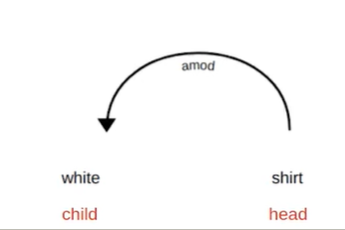







# Dependency Trees
* Tree of word relations generated in dependency parsing of sentences.
* Example sentence: "I will wear a white shirt on Monday."
* A Dependency Tree will show multiple relations. In the example below we can see the root of this sentence is `wear` as multiple branches stem from this. The root is the head of the phrase or sentence that determines the syntatical category of the words in the parse tree (standard linguistics definition). Usually a root is also the main VERB of a phrase or sentence.

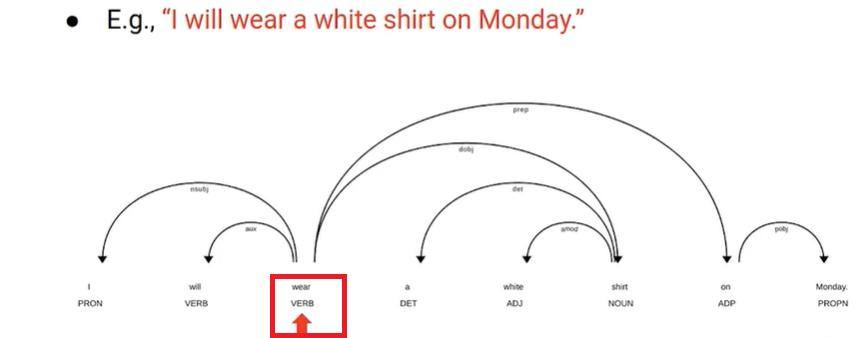




# Dependency Parsing Implementation in Python spacy library
* spacy dep parsing tags: https://spacy.io/api/data-formats#dependency-parsing

In [1]:
# import spacy library
import spacy

In [2]:
# load spacy nlp model
nlp = spacy.load('en_core_web_sm')

In [3]:
# define string to parse
text = "I will wear a white shirt on Monday."

In [4]:
# create Doc object in spacy pipeline
doc = nlp(text)

In [5]:
# get the dependency tags
for token in doc:
  print(token.text,'=>',token.dep_)

I => nsubj
will => aux
wear => ROOT
a => det
white => amod
shirt => dobj
on => prep
Monday => pobj
. => punct


Summary of output:
* We can see the word 'wear' was tagged as the `ROOT` of the dependency tree.

In [6]:
# visualize using displacy
from spacy import displacy

In [7]:
## visualize dependency parse tree
displacy.render(doc, jupyter=True)

We can see the output of the dependency parsing tree above with the ROOT word 'wear' as a VERB.

### Other dependency parsing features in spacy

In [8]:
## getting the HEAD or ROOT word
for token in doc:
  print(token.text,'=>',token.head.text)

I => wear
will => wear
wear => wear
a => shirt
white => shirt
shirt => wear
on => wear
Monday => on
. => wear


Observations of above: 'wear' is the head of itself because the root word is not the child of any other word in the phrase or sentence.

In [10]:
## getting the 'immediate children'
for token in doc:
  print(token.text,'=>', token.children)

I => <generator object at 0x7aae495a4040>
will => <generator object at 0x7aae495a4040>
wear => <generator object at 0x7aae495a4040>
a => <generator object at 0x7aae495a4040>
white => <generator object at 0x7aae495a4040>
shirt => <generator object at 0x7aae495a4040>
on => <generator object at 0x7aae495a4040>
Monday => <generator object at 0x7aae495a4040>
. => <generator object at 0x7aae495a4040>


We can see printing the children tokens of the tree returns python generator objects, thus we need to iterate over them to get the true output.

In [11]:
## iterating over children tokens
for token in doc:
  print(token.text,'=>',[child.text for child in token.children])

I => []
will => []
wear => ['I', 'will', 'shirt', 'on', '.']
a => []
white => []
shirt => ['a', 'white']
on => ['Monday']
Monday => []
. => []


Observation about above output: We notice the ROOT word 'wear' has multiple children including the punctuation period that ends the sentence.

In [12]:
## getting the left and right children
for token in doc:
  print(token.text,'=>', token.lefts,'=>',token.rights)

I => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
will => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
wear => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
a => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
white => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
shirt => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
on => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
Monday => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>
. => <generator object at 0x7aae3fd02ac0> => <generator object at 0x7aae3fd02d40>


Same issue as before generator objects as output, we will have to iterate to get them.

In [13]:
## getting left children
for token in doc:
  print(token.text,'=>',token.n_lefts,'=>',[left for left in token.lefts])

I => 0 => []
will => 0 => []
wear => 2 => [I, will]
a => 0 => []
white => 0 => []
shirt => 2 => [a, white]
on => 0 => []
Monday => 0 => []
. => 0 => []


In [14]:
## getting right children
for token in doc:
  print(token.text,'=>',token.n_rights,'=>',[right for right in token.rights])

I => 0 => []
will => 0 => []
wear => 3 => [shirt, on, .]
a => 0 => []
white => 0 => []
shirt => 0 => []
on => 1 => [Monday]
Monday => 0 => []
. => 0 => []


# Exercise in Dependency Parsing

**"On the coming Tuesday, I will be attending a conference on Natural Language Processing in Berlin.”**

On the above text, perform the following tasks:

Task 1: Visualize the dependency tree

Task 2: Find the root word


## First lets walk through the spacy pipeline

In [16]:
# import spacy
import spacy

# load spacy language model
nlp = spacy.load('en_core_web_sm')

# text to load
text = 'On the coming Tuesday, I will be attending a conference on Natural Language Processing in Berlin.'

# instantiate doc object
doc = nlp(text)

## Find ROOT

In [17]:
## get dep tags
for token in doc:
  print(token.text,'=>',token.dep_)

On => prep
the => det
coming => amod
Tuesday => pobj
, => punct
I => nsubj
will => aux
be => aux
attending => ROOT
a => det
conference => dobj
on => prep
Natural => compound
Language => compound
Processing => pobj
in => prep
Berlin => pobj
. => punct


Result: We can see the ROOT is the word "attending", lets visualize this.

## Visualize

In [18]:
from spacy import displacy

displacy.render(doc, jupyter=True)


We can see the visualization of the sentence with the ROOT word "attending" established as the main head verb of the sentence.